In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pi = np.pi
g = 10

# Common data

In [3]:
R = 114.1 * 10**(-3) # м нижний радиус подвеса 
dR = 0.5 * 10**(-3) # м
r = 30.5 * 10**(-3) # м верхний радиус подвеса
dr = 0.3 * 10**(-3) # м
m = 1004.8 * 10**(-3) # кг масса подвеса
dm = 0.5 * 10**(-3) # кг

L = 2170 * 10**(-3) # м расстояние от середины верхнего подвеса до края нижнего
dL = 1 * 10**(-3) # mm

In [4]:
z0 = (L**2 - R**2)**0.5 # м расстояние от середины нижнего до середины верхнего подвеса
dz0 = ( ((L * dL) / z0)**2 + ((R * dR) / z0)**2)**0.5 # м

k = (g * R * r)/(4 * pi * pi * z0)
dk = (g/(4 * pi * pi)) * (((r / z0) * dR)**2 + ((R / z0) * dr)**2 + ((R * r * dz0) / (z0**2))**2 )**0.5

In [103]:
print("k = ", k)
print("dk = ", dk)
print("z0 = ", z0)
print("dz0 = ", dz0)

k =  0.0004067871231561532
dk =  4.384343621854339e-06
z0 =  2.166998197968794
dz0 =  0.0010017312446067078


# Faults and avarage functions¶

In [7]:
def average_value(arr):
    return sum(arr) / len(arr)
def average_fault(arr):
    len_arr = len(arr)
    average_value = sum(arr)/len_arr
    res = 0
    for i in range(len(arr)):
        res+=(arr[i] - average_value)**2
    res = (res/(len_arr * (len_arr - 1)))**0.5
    return res

def experimental_Inertia_fault(random_m, T, dt): ## относительная ошибка момента инерции
    s1 = dm/random_m
    s2 = (2 * dt/T)
    s3 = dk/k
    return (s1**2 + s2**2 + s3**2)**0.5

# Common furmula

In [8]:
def experimental_Inertia(m, T):
    return k * m * T * T

## *Empty circle*

In [93]:
time_data_empty_circle = [22.14, 22.132, 22.139, 22.118, 22.125]
time_data_empty_circle = [x/5 for x in time_data_empty_circle]
time_fault_empty_circle = average_fault(time_data_empty_circle)

In [11]:
time_data_empty_circle_table = pd.DataFrame({
                        'T, c': [round(x, 3) for x in time_data_empty_circle]}, index= [i+1 for i in range(len(time_data_empty_circle))])

time_data_empty_circle_table

,"T, c"
1,4.428
2,4.426
3,4.428
4,4.424
5,4.425


In [14]:
print("average value of period of an empty circle = ", average_value(time_data_empty_circle))
print("average fault of period of an empty circle = ", average_fault(time_data_empty_circle), "c")
print("relevant fault of period of an empty circle = ", average_fault(time_data_empty_circle)/average_value(time_data_empty_circle))

average value of period of an empty circle =  4.42616
average fault of period of an empty circle =  0.0008376156636549078 c
relevant fault of period of an empty circle =  0.00018924206618262958


In [106]:
I0 = experimental_Inertia(m, average_value(time_data_empty_circle))
I0_fault = experimental_Inertia_fault(m, average_value(time_data_empty_circle), average_fault(time_data_empty_circle))
print("Момент инерции пустого подвеса равен ", I0*10000)
print("Относительная погрешность момента инерции пустого подвеса равняется ", I0_fault)
print("абсолютная погрешность момента инерции пустого подвеса ", I0 * I0_fault * 10000)

Момент инерции пустого подвеса равен  80.07575486467704
Относительная погрешность момента инерции пустого подвеса равняется  0.010796097810377435
абсолютная погрешность момента инерции пустого подвеса  0.8645056817588601


## *Two halves of sylinder*

### *Data*

In [34]:
n_small_clnd = 7
m_small_clnd = 525 * 10**(-3) ## кг масса полуцилиндра
M_clnd = 2 * m_small_clnd + m
# print(M_clnd)
dm_small_clnd = 10**(-3) ## кг
D_small_clnd = 80 * 10**(-3)
R_small_clnd = D_small_clnd / 2
dR_small_clnd = 0.5 * 10**(-3)

time_data_small_clnd = [17.811, 17.801, 17.806,
                     18.152, 18.149, 18.154,
                     18.647, 18.633, 18.613,
                     19.130, 19.121, 19.111,
                     19.589, 19.576, 19.562,
                     20.102, 20.111, 20.092,
                     20.609, 20.603, 20.592]
time_data_small_clnd = [x/5 for x in time_data_small_clnd]

length_data_small_clnd = [0, 11, 21, 32, 42, 51, 61] ## in mm расстояние от конца одного до конца другого полуцилиндра
length_data_small_clnd = [(x * 10**(-3) + D_small_clnd) for x in length_data_small_clnd] ##  in metrs расстояние от центра масс одного пц до центра масс другого 

length_data_small_clnd_table = [round(x*100, 3) for x in length_data_small_clnd] ## in cm округляем для таблицы 

time_data_small_clnd_table = [round(average_value([time_data_small_clnd[j + i] for i in range(3)]), 4) for j in range(0, n_small_clnd * 3, 3)]

length_data_small_clnd_table

[8.0, 9.1, 10.1, 11.2, 12.2, 13.1, 14.1]

### *table [n, T, d]*

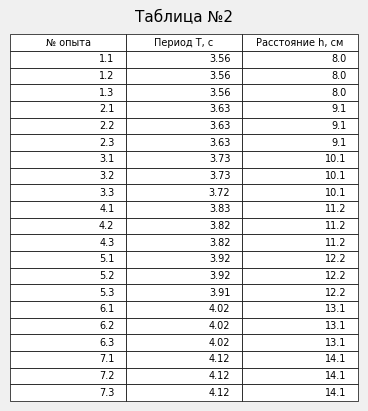

In [25]:
column1 = {'№ опыта': [(x//3 - (x%3 == 0)) + 1 + (x % 3 + 3*(x%3 == 0)) * 0.1 for x in range(1, n_small_clnd * 3 + 1)] }            
column2 = {'Период T, с': [round(x, 2) for x in time_data_small_clnd]}
column3 = {'Расстояние h, cм': [round(x*100, 3) for x in length_data_small_clnd for i in range(3)]}

column1.update(column2)
column1.update(column3)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (4, 0.05))
ax = fig.add_subplot(111)

ax.table(cellText = table11.values, colLabels = table11.columns)

ax.set_title("Таблица №2", size = 11)

ax.axis("off");

### *Теоретический момент инерции полуцилиндра отнисительно центра масс полуцилиндра*

In [159]:
theoretical_I_clnd = m_small_clnd * ((R_small_clnd**2) * (0.5  - (4 / (3 * pi))**2))
print("момент инерции полуцилиндра относительно его центра масс = ", theoretical_I_clnd * 10000)
theoretical_fault = ((dm / m_small_clnd)**2 + (2 * dR / R_small_clnd)**2)**0.5
print("theoretical  relevanat fault = ", theoretical_fault)
print("theoretical fault = ", theoretical_fault * theoretical_I_clnd * 10000)

момент инерции полуцилиндра относительно его центра масс =  2.6869369909410894
theoretical  relevanat fault =  0.025018134012720815
theoretical fault =  0.06722214972310099


### *experimental moment of inertia*

In [168]:

experimental_I_clnd = [(experimental_Inertia(M_clnd, time_data_small_clnd_table[i]) - I0 - 2 * m_small_clnd * ((4 * R_small_clnd / (3 * pi))**2 + (length_data_small_clnd[i] / 2) ** 2)) for i in range(n_small_clnd)]

experimental_I_clnd = [x / 2 for x in experimental_I_clnd]

### *Таблица опыт, период, расстояние, момент инерции системы эксп, момент инерции системы теор*

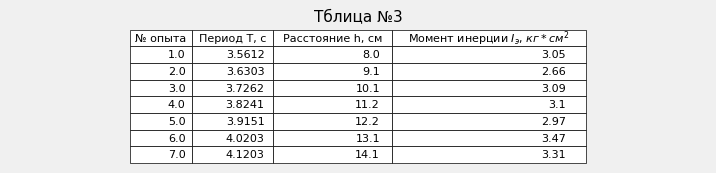

In [171]:
column1 = {'№ опыта': [x for x in range(1, n_small_clnd + 1)] }            
column2 = {'Период T, с': [time_data_small_clnd_table[i] for i in range(n_small_clnd)]}
column3 = {'Расстояние h, cм': [length_data_small_clnd_table[i] for i in range(n_small_clnd)]}
column4 = {'Момент инерции ${I_э}$, $кг*см^2$': [round(experimental_I_clnd[i] * 10000, 2) for i in range(n_small_clnd)]}
# column5 = {'Теоретический момент инерции ${I_т}$, $кг*cм^2$': [round((I0 + 2 * theoretical_I_clnd + 2 * m_small_clnd * ((length_data_small_clnd[i] / 2) ** 2 + (4 * R_small_clnd / (3 * pi))**2) ) * 10000, 2) for i in range(n_small_clnd)]}

column1.update(column2)
column1.update(column3)
column1.update(column4)
# column1.update(column5)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 0.000005))
ax = fig.add_subplot(111)
ax.set_title("Тблица №3", size = 11)

data_table = ax.table(cellText = table11.values, colLabels = table11.columns)

# tab2 = ax[2].table(cellText=dff.values, colLabels=dff.columns, loc='center', cellLoc='center')
# ax[2].set_title("Column Width Auto Set, Font AutoSize off")
ax.axis("off")
data_table.auto_set_font_size(False)

data_table.set_fontsize(8)

data_table.auto_set_column_width(col=list(range(len(table11.columns)))) # Provide integer list of columns to adjust
plt.show()


In [174]:
I_m = average_value(experimental_I_clnd)
print("average moment of inertia of clnd = ", I_m*10000)
relevant_fault_I_m = ((experimental_Inertia_fault(M_clnd, average_value(time_data_small_clnd_table), average_fault(time_data_small_clnd)))**2 + (I0_fault)**2 + (dm / m_small_clnd)**2 + (2 * dR / R_small_clnd)**2)**0.5
I_m_fault = (((average_fault(experimental_I_clnd))**2 + (relevant_fault_I_m *I_m)**2)**0.5)
print("fault absolute = ", I_m_fault * 10000)

average moment of inertia of clnd =  3.0942429827059104
fault absolute =  0.14935684182123798


### *Fults*

In [37]:
time_sc_fault = [average_fault([time_data_small_clnd[j + i] for i in range(3)]) for j in range(0, len(time_data_small_clnd), 3)]

### *Graph*

##### GRAPH I(T)

In [39]:
y =  [round(experimental_Inertia(M_clnd, time_data_small_clnd_table[i]) * 10000, 2) for i in range(n_small_clnd)]
x = [(time_data_small_clnd_table[i]) for i in range(n_small_clnd)] 

Text(0, 0.5, '$I, мкг*m^2$')

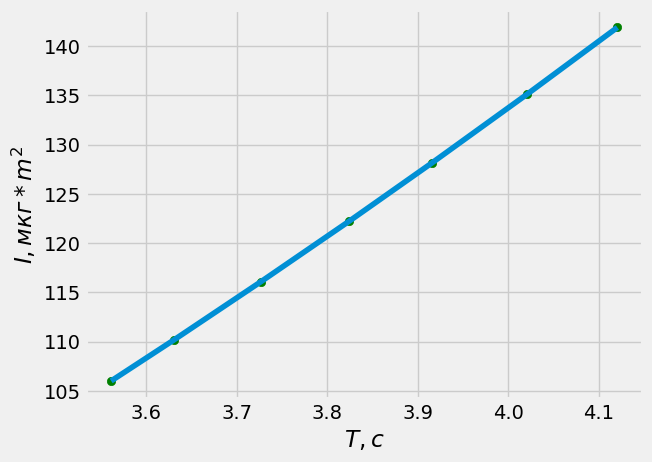

In [143]:
plt.plot(x, y)
plt.scatter(x, y, color = 'g')
plt.xlabel(r'$T, c$')
plt.ylabel(r'$I, мкг*m^2$')

##### GRAPH I(T**2)

In [46]:
y =  [round(experimental_Inertia(M_clnd, time_data_small_clnd_table[i]) * 10000, 2) for i in range(n_small_clnd)]
x2 = [(time_data_small_clnd_table[i] ** 2) for i in range(n_small_clnd)] 

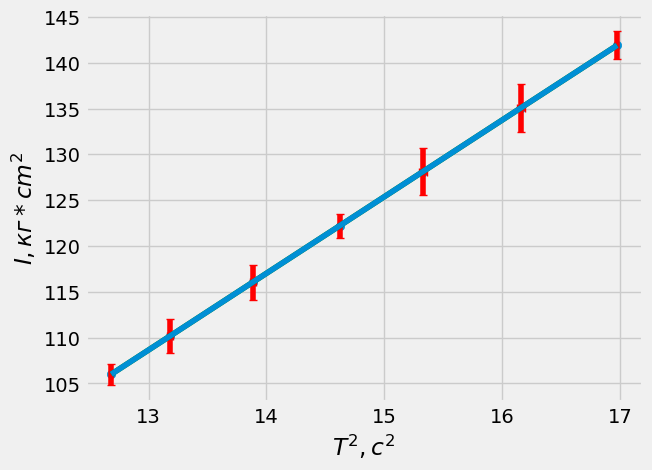

In [59]:
# plt.plot(x2, y)
# plt.xlabel(r'$T, c^2$')
# plt.ylabel(r'$I, мкг*m^2$')

time_fault_clnd = [average_fault([time_data_small_clnd[j + i] for i in range(3)]) for j in range(n_small_clnd)] ##
i_fault_clnd = [experimental_Inertia_fault(M_clnd, time_data_small_clnd_table[i], time_fault_clnd[i]) * experimental_Inertia(M_clnd, time_data_small_clnd_table[i]) * 10000 for i in range(n_small_clnd)]

plt.errorbar(x2, y, xerr=time_fault_clnd, yerr = i_fault_clnd, fmt='-', ecolor='red', capsize = 3)

plt.plot(x2, y, color = 'green', markersize = 5)
plt.scatter(x2, y)

# plt.plot(x2, y, ':', color = 'black', markersize = 1)
plt.xlabel(r'$T^2, c^2$')
plt.ylabel(r'$I, кг*cm^2$')
plt.grid(True)
# plt.legend(loc='best', fontsize=9)

# plt.title(r'Зависимость напряжения $U_в$ от силы тока $I_а$ при l = 20см')
plt.show()


In [41]:
model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))

 
64.15 x - 122.8
       2
8.381 x - 0.1819 x + 0.3693


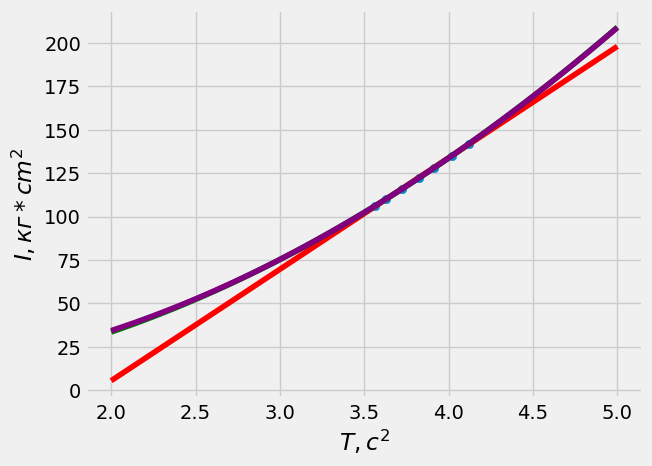

In [155]:
polyline = np.linspace(2, 5)
plt.scatter(x, y)
plt.xlabel(r'$T, c^2$')
plt.ylabel(r'$I, кг*cm^2$')

plt.plot(polyline, model1(polyline), color = 'red')
plt.plot(polyline, model2(polyline), color = 'green')
plt.plot(polyline, model3(polyline), color = 'purple')
# plt.plot(polyline, model4(polyline), color = 'yellow')
print(model1)
print(model2)
plt.show()

In [153]:
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
print(adjR(x , y , 1))
print(adjR(x , y , 2))
print(adjR(x , y , 3))
print(adjR(x , y , 4))
print(adjR(x , y , 5))

{'r_squared': 0.9994808101780579}
{'r_squared': 0.9999999426945676}
{'r_squared': 0.999999928171017}
{'r_squared': 0.9999999173212069}
{'r_squared': 0.9999998946815534}


### *Faults*

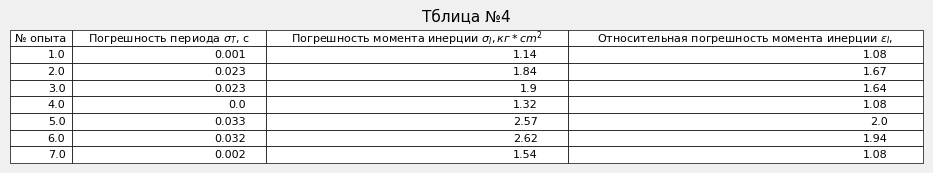

In [66]:
column1 = {'№ опыта': [x for x in range(1, n_small_clnd + 1)] }            
column2 = {'Погрешность периода $\sigma_T$, с': [round(time_fault_clnd[i], 3) for i in range(n_small_clnd)]}
column3 = {'Погрешность момента инерции $\sigma_I, кг*cm^2$': [round(i_fault_clnd[i], 2) for i in range(n_small_clnd)]}
column4 = {'Относительная погрешность момента инерции $\epsilon_I, %2$': [round(experimental_Inertia_fault(M_clnd, time_data_small_clnd_table[i], time_fault_clnd[i])*100, 2) for i in range(n_small_clnd)]}

column1.update(column2)
column1.update(column3)
column1.update(column4)

table11 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 0.000005))
ax = fig.add_subplot(111)
ax.set_title("Тблица №4", size = 11)

data_table = ax.table(cellText = table11.values, colLabels = table11.columns)

# tab2 = ax[2].table(cellText=dff.values, colLabels=dff.columns, loc='center', cellLoc='center')
# ax[2].set_title("Column Width Auto Set, Font AutoSize off")
ax.axis("off")
data_table.auto_set_font_size(False)

data_table.set_fontsize(8)

data_table.auto_set_column_width(col=list(range(len(table11.columns)))) # Provide integer list of columns to adjust
plt.show()

In [152]:
i_disk_platf = average_value([experimental_Inertia(M_clnd, time_data_small_clnd_table[i]) * 10000 for i in range(n_small_clnd)])
print("moment of average inertia = ", i_disk_platf)
i_disk_platf_fault = average_fault([experimental_Inertia(M_clnd, time_data_small_clnd_table[i]) * 10000 for i in range(n_small_clnd)])
print("fautl of moment of inertia  = ", i_disk_platf_fault)
print("relevant fault = ", i_disk_platf_fault / i_disk_platf)

moment of average inertia =  122.79736684820669
fautl of moment of inertia  =  4.957395646484378
relevant fault =  0.040370537037755505


## *Ring*

### *data*

In [86]:
m_ring = 981.3 * 10 **(-3)
D_ring = 163 * 10 **(-3)
R_ring = D_ring / 2
dR_ring = 0.5 * 10**(-3)

n_ring = 5

time_data_ring = [21.334, 21.286, 21.331, 21.333, 21.316]
time_data_ring = [x / 5 for x in time_data_ring]

time_fault_ring = average_fault(time_data_ring)



### *table*

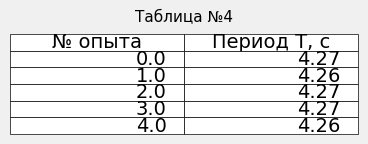

In [87]:
column1 = {'№ опыта': [x for x in range(n_ring)] }            
column2 = {'Период T, с': [round(x, 2) for x in time_data_ring]}

column1.update(column2)

table22 = pd.DataFrame(column1)

fig = plt.figure(figsize = (4, 0.05))
ax = fig.add_subplot(111)

ax.table(cellText = table22.values, colLabels = table22.columns)

ax.set_title("Таблица №4", size = 11)

ax.axis("off");

## *momemt of inertia of the ring theoretical*

In [88]:
theoretical_I_ring_centre = m_ring * (R_ring**2)

### *moment of inertia of the ring experimental*

In [125]:
relevant_ring_fault = ((experimental_Inertia_fault(m_ring + m, average_value(time_data_ring), time_fault_ring))**2 + (experimental_Inertia_fault(m, average_value(time_data_empty_circle), time_fault_empty_circle))**2)**0.5
theoretical_relevant_ring_fault = ((dm / m_ring)**2 + (2 * dR_ring / R_ring)**2)**0.5

In [126]:
experimental_I_ring_circle = experimental_Inertia(m_ring + m, average_value(time_data_ring))
experimental_I_ring = experimental_I_ring_circle - I0
fault_I_ring_circle = experimental_Inertia_fault(m_ring + m, average_value(time_data_ring), time_fault_ring)
print("experimental moment of inertia of ring + cirlce = ", experimental_I_ring_circle * 10000)
print("experimental relevant fault of inertia of ring  + circle =", fault_I_ring_circle)
print("experimental absolute fault of moment of inertia of ring + circle = ", fault_I_ring_circle * experimental_I_ring_circle * 10000)
print("experimental moment of inertia ring = ", experimental_I_ring)
print("only theoretical moment of ineritia ring = ", theoretical_I_ring_centre * 10000)
print("theoretical relevant ring fault = ", theoretical_relevant_ring_fault)
print("absolute theoretical ring fault = ", theoretical_relevant_ring_fault * theoretical_I_ring_centre * 10000)
print("experimental moment of inertia of ring= ", experimental_I_ring * 10000)
print("относительная ошибка момента инерции кольца = ", relevant_ring_fault)
print("absolute ошибка момента инерции кольца = ", relevant_ring_fault * experimental_I_ring * 10000)
print("relevant fault_ring_circle _inertia = ", fault_I_ring_circle)
print("average period of ring = ", average_value(time_data_ring))
print("period fault = ", time_fault_ring)


experimental moment of inertia of ring + cirlce =  146.89354110521316
experimental relevant fault of inertia of ring  + circle = 0.010814701258772859
experimental absolute fault of moment of inertia of ring + circle =  1.5886097638961514
experimental moment of inertia ring =  0.006681778624053612
only theoretical moment of ineritia ring =  65.18039925
theoretical relevant ring fault =  0.012280513566026252
absolute theoretical ring fault =  0.8004487772286323
experimental moment of inertia of ring=  66.81778624053612
относительная ошибка момента инерции кольца =  0.015281148230671008
absolute ошибка момента инерции кольца =  1.0210524959869223
relevant fault_ring_circle _inertia =  0.010814701258772859
average period of ring =  4.264
period fault =  0.0018209887424143322


## *Ring with closure*

### *data*

In [128]:
m_closure = 587.7 * 10 ** (-3)
n_closure = 3

time_data_closure = [20.048, 20.034, 20.027]
time_data_closure = [x / 5 for x in time_data_closure]

average_time_closure = average_value(time_data_closure)
time_fault_closure = average_fault(time_data_closure)


### *table*

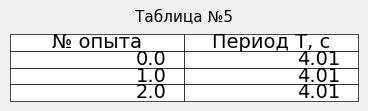

In [124]:
column1 = {'№ опыта': [x for x in range(n_closure)] }            
column2 = {'Период T, с': [round(x, 2) for x in time_data_closure]}

column1.update(column2)

table33 = pd.DataFrame(column1)

fig = plt.figure(figsize = (4, 0.05))
ax = fig.add_subplot(111)

ax.table(cellText = table33.values, colLabels = table33.columns)

ax.set_title("Таблица №5", size = 11)

ax.axis("off");

### *theoretical moment of inertia of closure only*

In [177]:
theoretical_I_closure = m_closure * ((R_ring)**2) * 0.5 + m_ring * ((R_ring)**2)
relevant_theoretical_I_closure = ((dm / m_closure)**2 + 2 * (2 * dR / R_ring)**2 + (dm / m_ring)**2)**0.5

### *experimental moment of inertia of closure*

In [178]:
experimental_I_circle_ring_closure = experimental_Inertia(m + m_ring + m_closure, average_time_closure)
relevant_experimental_I_circle_ring_closure_fault = experimental_Inertia_fault(m + m_ring + m_closure, average_time_closure, time_fault_closure)


experimental_I_closure = experimental_I_circle_ring_closure - experimental_I_ring_circle
relevant_experimental_I_closure_fault = ((relevant_experimental_I_circle_ring_closure_fault)**2 + (fault_I_ring_circle)**2)**0.5

In [180]:
print("average period to closure = ", average_time_closure)
print("period fault closure = ", time_fault_closure)

print("experimental moment of inertia of ring + circle + closure = ", (experimental_I_circle_ring_closure - I0)* 10000)
print("experimental fault of moment of inertia of r + c + c = ", experimental_I_circle_ring_closure * 10000 * relevant_experimental_I_circle_ring_closure_fault )

print("theoretical moment of inertia of closure = ", theoretical_I_closure*10000)
print("theoretical fault moment of inertia of closure = ", theoretical_I_closure*10000*relevant_theoretical_I_closure)

print("experimental moment of inertia of closure = ", experimental_I_closure * 10000)
print("experimental fault moment of inertia of closure = ", experimental_I_closure * 10000*relevant_experimental_I_closure_fault)

average period to closure =  4.007266666666667
period fault closure =  0.0012346839451634515
experimental moment of inertia of ring + circle + closure =  88.05163903410343
experimental fault of moment of inertia of r + c + c =  1.8153269116722388
theoretical moment of inertia of closure =  84.698650875
theoretical fault moment of inertia of closure =  1.4721157307781905
experimental moment of inertia of closure =  21.233852793567305
experimental fault moment of inertia of closure =  0.32449613370393116


## *only closure*

### *data*

In [132]:
time_data_only_closure = [19.765, 19.740, 19.740]

n_closure = 3

time_data_only_closure = [x / 5 for x in time_data_only_closure]

average_time_only_closure = average_value(time_data_only_closure)
time_fault_only_closure = average_fault(time_data_only_closure)


### *table*

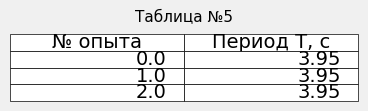

In [133]:
column1 = {'№ опыта': [x for x in range(n_closure)] }            
column2 = {'Период T, с': [round(x, 2) for x in time_data_only_closure]}

column1.update(column2)

table44 = pd.DataFrame(column1)

fig = plt.figure(figsize = (4, 0.05))
ax = fig.add_subplot(111)

ax.table(cellText = table44.values, colLabels = table44.columns)

ax.set_title("Таблица №5", size = 11)

ax.axis("off");

### *experimental moment of ineria of only closure*

In [139]:
experimental_I_circle_closure = experimental_Inertia(m + m_closure, average_value(time_data_only_closure))
relevant_experimental_I_circle_closure_fault = experimental_Inertia_fault(m + m_closure, average_value(time_data_only_closure), average_fault(time_data_only_closure))

experimental_I_only_closure = experimental_I_circle_closure - I0
relevant_experimental_I_only_closure_fault = ((relevant_experimental_I_circle_closure_fault)**2 + (I0_fault)**2)**0.5
relevant_experimental_I_only_closure_fault 

0.015281734963802742

In [140]:
print("average period to closure = ", average_value(time_data_only_closure))
print("period fault closure = ", average_fault(time_data_only_closure))

print("experimental moment of inertia of circle + closure = ", experimental_I_circle_closure * 10000)
print("experimental fault of moment of inertia of c + c = ", experimental_I_circle_closure * 10000 * relevant_experimental_I_circle_closure_fault )

print("experimental moment of inertia of closure = ", experimental_I_only_closure * 10000)
print("experimental fault moment of inertia of closure = ", experimental_I_only_closure * 10000*relevant_experimental_I_only_closure_fault)

average period to closure =  3.949666666666667
period fault closure =  0.0016666666666669272
experimental moment of inertia of circle + closure =  101.0572619808122
experimental fault of moment of inertia of c + c =  1.0929878785328038
experimental moment of inertia of closure =  20.981507116135163
experimental fault moment of inertia of closure =  0.32063383088991876


## theoretical moment of inertia of only closure

In [176]:
theor_I_closure = m_closure * (R_ring **2) * 0.5
theor_I_closure_fault = ((dm / m_closure)**2 + (2 * dR/ R_ring)**2)**0.5

print("theoretical moment of inertia of closure = ", theor_I_closure * 10000)
print("fault = ", theor_I_closure_fault * theor_I_closure * 10000)

theoretical moment of inertia of closure =  19.518251625000005
fault =  0.24006276092243706
